Figure 7 of [Compound lensing: Einstein Zig-Zags and high multiplicity lensed images](http://adsabs.harvard.edu/abs/2016MNRAS.456.2210C)

In [1]:
%matplotlib inline
import grale.plotutil as plotutil
import grale.lenses as lenses
import grale.feedback as feedback
import grale.images as images
from grale.cosmology import Cosmology
from grale.constants import *
from grale.multiplane import MultiImagePlane
import numpy as np
import matplotlib.pyplot as plt
import sys
import json

V = lambda x,y: np.array([x,y], dtype=np.double)
cosm = Cosmology(0.7, 0.3, 0, 0.7)

feedback.setDefaultFeedback("notebook")

In [2]:
zs = 10

zd = 0.1
coreRad = 0#U*1e-7
Dd = cosm.getAngularDiameterDistance(zd)
nsis = lenses.NSISLens(Dd, { "velocityDispersion": 190000, "coreRadius": coreRad })

zd2 = 1.6
Dd2 = cosm.getAngularDiameterDistance(zd2)
nsis2 = lenses.NSISLens(Dd2, { "velocityDispersion": 244800, "coreRadius": coreRad })

beta = (cosm.getAngularDiameterDistance(zd, zd2)*cosm.getAngularDiameterDistance(zs))/(
        cosm.getAngularDiameterDistance(zd2)*cosm.getAngularDiameterDistance(zd, zs))
print("beta", beta)
print("beta^-1", beta**-1)

alpha1 = nsis.getAlphaVector([1.0, 0.0])[0]*cosm.getAngularDiameterDistance(zd, zs)/cosm.getAngularDiameterDistance(zs)
alpha2 = nsis2.getAlphaVector([1.0, 0.0])[0]*cosm.getAngularDiameterDistance(zd2, zs)/cosm.getAngularDiameterDistance(zs)
print("alpha1 (arcsec)", alpha1/ANGLE_ARCSEC)
print("alpha2 (units of alpha1)", alpha2/alpha1)

U = alpha1


pos = V(0,0)*U
pos2 = V(0.9,0)*U

lens = lenses.CompositeLens(Dd, [{"lens": nsis, "x": pos[0], "y": pos[1], "angle": 0, "factor": 1}])
lens2 = lenses.CompositeLens(Dd2, [{"lens": nsis2, "x": pos2[0], "y": pos2[1], "angle": 0, "factor": 1}])



beta 0.9500148962913028
beta^-1 1.052615073620246
alpha1 (arcsec) 0.9949706639179734
alpha2 (units of alpha1) 0.900979984427641


In [3]:
tr = V(3.5,2.5)*U
bl = V(-1.5,-2.5)*U

N = 1023
print(tr, bl)
print(U/ANGLE_ARCSEC)

lensInfo = { "lens": [ (lens, zd), (lens2, zd2) ], "bottomleft": bl, "topright": tr, "zs": zs, "numx": N, "numy": N }
plotutil.plotImagePlane(lensInfo, cosmology=cosm, angularUnit=U, axes=False, renderer="openmp");

[1.68831387e-05 1.20593848e-05] [-7.23563085e-06 -1.20593848e-05]
0.9949706639179734


Text(value='')

FloatProgress(value=0.0)

Text(value='')

{'bottomleft': array([-7.23563085e-06, -1.20593848e-05]),
 'imageplane': <grale.multiplane.MultiImagePlane at 0x7fb8325ca3c8>,
 'lens': [(<grale.lenses.CompositeLens at 0x7fb82c392150>, 0.1),
  (<grale.lenses.CompositeLens at 0x7fb82c392250>, 1.6)],
 'lensplane': <grale.multiplane.MultiLensPlane at 0x7fb8064fd588>,
 'numx': 1023,
 'numy': 1023,
 'topright': array([1.68831387e-05, 1.20593848e-05]),
 'zs': 10}

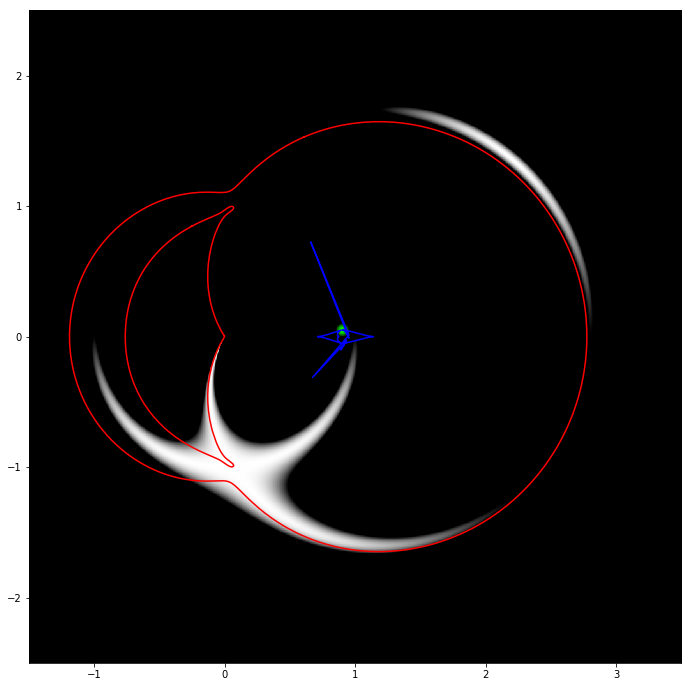

In [4]:
xpos, ypos = 0.9, 0.05

src = images.CircularSource(V(xpos, ypos)*U, 0.05*U, 1, True)
src2 = images.CircularSource(V(xpos, -ypos)*U, 0.05*U, 1, True)
plt.figure(figsize=(12,12))
plotutil.plotImagePlane(lensInfo, cosmology=cosm, angularUnit=U, sources=[src]) #, src2])
#plt.gca().set_xlim([-1,2])
#plt.gca().set_ylim([-1.5,1.5])

In [5]:
ip = lensInfo["imageplane"]

In [6]:
critLines = ip.getCriticalLines()
allPoints = []
#for part in critLines:
for p in critLines[1]:
    allPoints.append(p)

In [9]:
class MyAnim(plotutil.NotebookAnimation):
    def __init__(self, skip):
        num = len(allPoints)//skip
        super(MyAnim, self).__init__("multisis-criticalline.mp4", [0], [len(allPoints)-1], num, 25)

    def onInit(self, axes):
        pass

    def onDraw(self, pos, axes):
        
        idx = int(round(pos[0]))
        idx = min(idx,len(allPoints))
        
        axes.clear()
        # Turn off the feedback here, to avoid a clash with the feedback about
        # the frame number being rendered
        plotutil.plotImagePlane(lensInfo, cosmology=cosm, angularUnit=ANGLE_ARCSEC, axes=axes, feedbackObject="none")
        
        p = allPoints[idx]
        tx, ty = p/ANGLE_ARCSEC
        bx, by = ip.traceTheta(p)/ANGLE_ARCSEC
        axes.plot([tx, bx], [ty,by], '-', color='white')
        axes.set_xlim([-1,2])
        axes.set_ylim([-1.5,1.5])        

In [10]:
plt.figure(figsize=(12,12))
MyAnim(1)

FloatProgress(value=1.0, max=2201.0, min=1.0)

Text(value='')